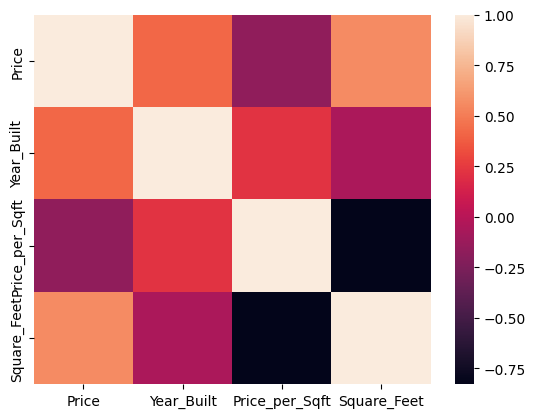

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as se

class Estate_analyse:

    def core_analyse():
        # READ DATA
        data_set = pd.read_csv('/home/happy/Downloads/real_estate_dataset.csv')
        print(data_set.isnull().sum())
        print(data_set.info())

        # ANALYSE DATA
        print(data_set.columns)
        se.lineplot(data=data_set,x = 'Year_Built', y='Price')
        
         # Derive new column
        data_set['Price_per_Sqft'] = data_set['Price'] / data_set['Square_Feet']

        # Display data with new column
        print(data_set[['ID', 'Price', 'Square_Feet', 'Price_per_Sqft']].sample(10))

        # BOXPLOT
        boxplot = se.boxplot(data=data_set, x='Distance_to_Center', y='Price_per_Sqft', color='red')
        plt.show(boxplot)

        # CORRELATIO
        corr = data_set.corr()
        heatmap = se.heatmap(data=corr)
        plt.show(heatmap)

        # Derive 'Age' column
        CURRENT_YEAR = 2025
        data_set['Age'] = CURRENT_YEAR - data_set['Year_Built']

        # Optional sanity check (remove negative ages if bad data exists)
        data_set = data_set[data_set['Age'] >= 0]

        # Select relevant columns for correlation
        corr_columns = ['Price', 'Age', 'Num_Bedrooms', 'Square_Feet']

        # Compute correlation matrix
        corr_matrix = data_set[corr_columns].corr()

        # # Print the correlation matrix (optional)
        plt.figure(figsize=(8, 6))
        se.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
        plt.title('Correlation Matrix: Price vs Age, Bedrooms, Size', fontsize=14)
        plt.tight_layout()

        # Show plot
        plt.show()

        # Visualize
        se.lineplot(data=data_set, x='Price', y='Year_Built')
        se.boxplot(data=data_set, x='Price')

        corr_column = ['Price', 'Year_Built','Price_per_Sqft', 'Square_Feet']
        corr_matrix = data_set[corr_column].corr()
        se.heatmap(data=corr_matrix)


if __name__=='__main__':
    run = Estate_analyse
    run.core_analyse()